<a href="https://colab.research.google.com/github/56sarager/Data-Analysis-Colabs/blob/main/Neutron_Irradiation_Coins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neutron Irradiation Coins

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
df120c1=pd.read_csv(path+'exp5_20c1.tsv', sep='\t', skiprows=10)
df220c1=pd.read_csv(path+'background_2.tsv', sep='\t',skiprows=10)
df320c1=pd.read_csv(path+'background_5.tsv', sep='\t',skiprows=10)
df420=pd.read_csv(path+'background_2fexp5.tsv', sep='\t',skiprows=10)
coin=df420.loc[:, 'Voltage']
coin=np.sum(coin)
correction = np.ceil((df220c1.loc[:, 'Voltage']+df320c1.loc[:, 'Voltage']+coin)/8)
cdf20c1=[]
i=1
while i <= 3:
  j=df120c1.loc[i, 'Voltage']-correction
  cdf20c1.append(j)
  i+=1
cdf220c1=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in cdf20c1:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        cdf220c1.append(p3)
del cdf220c1[1::2]
cdf320c1 = np.array(cdf220c1, dtype=np.float32)
cdf320c1 = cdf320c1/1.1
texp5=[300,600,900]
texp5 = np.array(texp5, dtype=np.float32)

x_data20c1 = texp5
y_data20c1 = np.copy(cdf320c1)

# Convert data to PyTorch tensors
x_tensor20c1 = torch.from_numpy(x_data20c1).float().view(-1, 1)
y_tensor20c1 = torch.from_numpy(y_data20c1).float().view(-1, 1)
# Define the exponential decay model
#init20c1 = [185.08, 0.0006]
init20c1 = [145, 0.0001]
a_init20c1 = init20c1[0]
b_init20c1 = init20c1[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init20c1, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init20c1, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred20c1 = model(x_tensor20c1)
    # Compute the loss
    loss = loss_function(y_pred20c1, y_tensor20c1)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit20c1 = model.a.item()
b_fit20c1 = model.b.item()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
df120c2=pd.read_csv(path+'exp5_20c2.tsv', sep='\t', skiprows=10)
df220c2=pd.read_csv(path+'background_2.tsv', sep='\t',skiprows=10)
df320c2=pd.read_csv(path+'background_5.tsv', sep='\t',skiprows=10)
df420=pd.read_csv(path+'background_2fexp5.tsv', sep='\t',skiprows=10)
coin=df420.loc[:, 'Voltage']
coin=np.sum(coin)
correction = np.ceil((df220c1.loc[:, 'Voltage']+df320c1.loc[:, 'Voltage']+coin)/8)
cdf20c2=[]
i=1
while i <= 3:
  j=df120c2.loc[i, 'Voltage']-correction
  cdf20c2.append(j)
  i+=1
cdf220c2=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in cdf20c2:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        cdf220c2.append(p3)
del cdf220c2[1::2]
cdf320c2 = np.array(cdf220c2, dtype=np.float32)
cdf320c2 = cdf320c2/1.18

x_data20c2 = texp5
y_data20c2 = np.copy(cdf320c2)

# Convert data to PyTorch tensors
x_tensor20c2 = torch.from_numpy(x_data20c2).float().view(-1, 1)
y_tensor20c2 = torch.from_numpy(y_data20c2).float().view(-1, 1)
# Define the exponential decay model
#init20c2 = [148.59, 0.0008]
init20c2 = [70, 0.0001]
a_init20c2 = init20c2[0]
b_init20c2 = init20c2[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init20c2, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init20c2, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred20c2 = model(x_tensor20c2)
    # Compute the loss
    loss = loss_function(y_pred20c2, y_tensor20c2)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit20c2 = model.a.item()
b_fit20c2 = model.b.item()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
df1b1=pd.read_csv(path+'exp5_b1.tsv', sep='\t', skiprows=10)
df2b1=pd.read_csv(path+'background_2.tsv', sep='\t',skiprows=10)
df3b1=pd.read_csv(path+'background_5.tsv', sep='\t',skiprows=10)
df420=pd.read_csv(path+'background_2fexp5.tsv', sep='\t',skiprows=10)
coin=df420.loc[:, 'Voltage']
coin=np.sum(coin)
correction = np.ceil((df220c1.loc[:, 'Voltage']+df320c1.loc[:, 'Voltage']+coin)/8)
cdfb1=[]
i=1
while i <= 3:
  j=df1b1.loc[i, 'Voltage']-correction
  cdfb1.append(j)
  i+=1
cdf2b1=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in cdfb1:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        cdf2b1.append(p3)
del cdf2b1[1::2]
cdf3b1 = np.array(cdf2b1, dtype=np.float32)

x_datab1 = texp5
y_datab1 = np.copy(cdf3b1)
# Convert data to PyTorch tensors
x_tensorb1 = torch.from_numpy(x_datab1).float().view(-1, 1)
y_tensorb1 = torch.from_numpy(y_datab1).float().view(-1, 1)
# Define the exponential decay model
#initb1 = [136.63, 0.0007]
initb1 = [90, 0.0001]
a_initb1 = initb1[0]
b_initb1 = initb1[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_initb1, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_initb1, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_predb1 = model(x_tensorb1)
    # Compute the loss
    loss = loss_function(y_predb1, y_tensorb1)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fitb1 = model.a.item()
b_fitb1 = model.b.item()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
df1b2=pd.read_csv(path+'exp5_b2.tsv', sep='\t', skiprows=10)
df2b2=pd.read_csv(path+'background_2.tsv', sep='\t',skiprows=10)
df3b2=pd.read_csv(path+'background_5.tsv', sep='\t',skiprows=10)
df420=pd.read_csv(path+'background_2fexp5.tsv', sep='\t',skiprows=10)
coin=df420.loc[:, 'Voltage']
coin=np.sum(coin)
correction = np.ceil((df220c1.loc[:, 'Voltage']+df320c1.loc[:, 'Voltage']+coin)/8)
cdfb2=[]
i=1
while i <= 3:
  j=df1b2.loc[i, 'Voltage']-correction
  cdfb2.append(j)
  i+=1
cdf2b2=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in cdfb2:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        cdf2b2.append(p3)
del cdf2b2[1::2]
cdf3b2 = np.array(cdf2b2, dtype=np.float32)
cdf3b2 = cdf3b2/1.08

x_datab2 = texp5
y_datab2 = np.copy(cdf3b2)
# Convert data to PyTorch tensors
x_tensorb2 = torch.from_numpy(x_datab2).float().view(-1, 1)
y_tensorb2 = torch.from_numpy(y_datab2).float().view(-1, 1)
# Define the exponential decay model
#initb2 = [167.23, 0.001]
initb2 = [90, 0.0001]
a_initb2 = initb2[0]
b_initb2 = initb2[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_initb2, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_initb2, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_predb2 = model(x_tensorb2)
    # Compute the loss
    loss = loss_function(y_predb2, y_tensorb2)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fitb2 = model.a.item()
b_fitb2 = model.b.item()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
df1bf=pd.read_csv(path+'exp5_brassf.tsv', sep='\t', skiprows=10)
df2bf=pd.read_csv(path+'background_2.tsv', sep='\t',skiprows=10)
df3bf=pd.read_csv(path+'background_5.tsv', sep='\t',skiprows=10)
df420=pd.read_csv(path+'background_2fexp5.tsv', sep='\t',skiprows=10)
coin=df420.loc[:, 'Voltage']
coin=np.sum(coin)
correction = np.ceil((df220c1.loc[:, 'Voltage']+df320c1.loc[:, 'Voltage']+coin)/8)
cdfbf=[]
i=1
while i <= 6:
  j=df1bf.loc[i, 'Voltage']-correction
  cdfbf.append(j)
  i+=1
cdf2b2f=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in cdfbf:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        cdf2b2f.append(p3)
del cdf2b2f[1::2]
del cdf2b2f[3:]
cdf3bf = np.array(cdf2b2f, dtype=np.float32)
cdf3bf = cdf3bf/1.03
t=[300,600,900,1200,1500,1800]
t = np.array(t, dtype=np.float32)
x_databf = texp5
y_databf = np.copy(cdf3bf)
# Convert data to PyTorch tensors
x_tensorbf = torch.from_numpy(x_databf).float().view(-1, 1)
y_tensorbf = torch.from_numpy(y_databf).float().view(-1, 1)
# Define the exponential decay model
#initb2 = [167.23, 0.001]
initbf = [100, 0.0001]
a_initbf = initbf[0]
b_initbf = initbf[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_initb2, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_initb2, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_predbf = model(x_tensorbf)
    # Compute the loss
    loss = loss_function(y_predbf, y_tensorbf)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fitbf = model.a.item()
b_fitbf = model.b.item()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
df120f=pd.read_csv(path+'exp5_20cf.tsv', sep='\t', skiprows=10)
df220f=pd.read_csv(path+'background_2.tsv', sep='\t',skiprows=10)
df320f=pd.read_csv(path+'background_5.tsv', sep='\t',skiprows=10)
df420=pd.read_csv(path+'background_2fexp5.tsv', sep='\t',skiprows=10)
coin=df420.loc[:, 'Voltage']
coin=np.sum(coin)
correction = np.ceil((df220c1.loc[:, 'Voltage']+df320c1.loc[:, 'Voltage']+coin)/8)
cdf20f=[]
i=1
while i <= 6:
  j=df120f.loc[i, 'Voltage']-correction
  cdf20f.append(j)
  i+=1
cdf2202f=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in cdf20f:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        cdf2202f.append(p3)
del cdf2202f[1::2]
del cdf2202f[3:]
cdf320f = np.array(cdf2202f, dtype=np.float32)

x_data20f = texp5
y_data20f = np.copy(cdf320f)
# Convert data to PyTorch tensors
x_tensor20f = torch.from_numpy(x_data20f).float().view(-1, 1)
y_tensor20f = torch.from_numpy(y_data20f).float().view(-1, 1)
# Define the exponential decay model
#initb2 = [167.23, 0.001]
init20f = [370, 0.0001]
a_init20f = init20f[0]
b_init20f = init20f[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init20f, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init20f, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred20f = model(x_tensor20f)
    # Compute the loss
    loss = loss_function(y_pred20f, y_tensor20f)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit20f = model.a.item()
b_fit20f = model.b.item()

20c 1 -> Equation:y=155.4408exp(-0.0022*t) Half-Life: T=318.0699sec
   Count Uncertainties +/- for Points Left to Right: [0.10206207 0.20412414 0.19611613]
20c 2 -> Equation:y=79.8694exp(-0.0015*t) Half-Life: T=471.6902sec
   Count Uncertainties +/- for Points Left to Right: [0.12309149 0.26726124 0.18569534]
20c F -> Equation:y=361.4731exp(-0.0056*t) Half-Life: T=124.8464sec
   Count Uncertainties +/- for Points Left to Right: [0.13130642 0.15811388 0.57735026]
Brass 1 -> Equation:y=99.8636exp(-0.0017*t) Half-Life: T=407.9597sec
   Count Uncertainties +/- for Points Left to Right: [0.12309149 0.26726124 0.18569534]
Brass 2 -> Equation:y=99.7755exp(-0.0019*t) Half-Life: T=373.4636sec
   Count Uncertainties +/- for Points Left to Right: [0.13130642 0.14744195 0.70710677]
Brass F -> Equation:y=80.3592exp(-0.0024*t) Half-Life: T=294.3679sec
   Count Uncertainties +/- for Points Left to Right: [0.17407766 0.18569534 0.40824828]


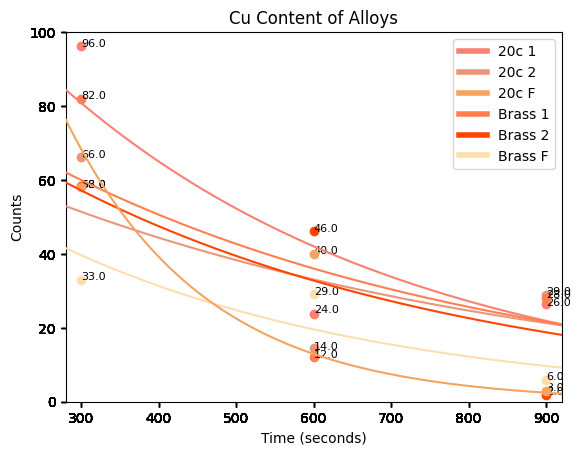

[96. 24. 26.]
[66. 14. 29.]
[58. 40.  3.]
[82. 12. 28.]
[58. 46.  2.]
[33. 29.  6.]


In [ ]:
from matplotlib.lines import Line2D
# Generate the fitted curve
exp5t2=np.linspace(0,920,920)
y_fit20c1 = a_fit20c1 * np.exp(-b_fit20c1 * exp5t2)
y_fit20c2 = a_fit20c2 * np.exp(-b_fit20c2 * exp5t2)
y_fit20f = a_fit20f * np.exp(-b_fit20f * exp5t2)
y_fitb1 = a_fitb1 * np.exp(-b_fitb1 * exp5t2)
y_fitb2 = a_fitb2 * np.exp(-b_fitb2 * exp5t2)
y_fitbf = a_fitbf * np.exp(-b_fitbf * exp5t2)

na_fit20c1=str(round(a_fit20c1,4))
T20c1=np.log(2)/b_fit20c1
nb_fit20c1=str(round(b_fit20c1,4))
nT20c1=str(round(T20c1,4))
na_fit20c2=str(round(a_fit20c2,4))
T20c2=np.log(2)/b_fit20c2
nb_fit20c2=str(round(b_fit20c2,4))
nT20c2=str(round(T20c2,4))
na_fitb1=str(round(a_fitb1,4))
Tb1=np.log(2)/b_fitb1
nb_fitb1=str(round(b_fitb1,4))
nTb1=str(round(Tb1,4))
na_fitb2=str(round(a_fitb2,4))
Tb2=np.log(2)/b_fitb2
nb_fitb2=str(round(b_fitb2,4))
nTb2=str(round(Tb2,4))
na_fit20f=str(round(a_fit20f,4))
T20f=np.log(2)/b_fit20f
nb_fit20f=str(round(b_fit20f,4))
nT20f=str(round(T20f,4))
na_fitbf=str(round(a_fitbf,4))
Tbf=np.log(2)/b_fitbf
nb_fitbf=str(round(b_fitbf,4))
nTbf=str(round(Tbf,4))

fig=plt.figure()
ax=fig.add_subplot(111, label="501")
ax2=fig.add_subplot(111, label="502", frame_on=False)
ax3=fig.add_subplot(111, label="503", frame_on=False)
ax4=fig.add_subplot(111, label="504", frame_on=False)
ax5=fig.add_subplot(111, label="505", frame_on=False)
ax6=fig.add_subplot(111, label="506", frame_on=False)
ax7=fig.add_subplot(111, label="507", frame_on=False)
ax8=fig.add_subplot(111, label="508", frame_on=False)
ax9=fig.add_subplot(111, label="509", frame_on=False)
ax10=fig.add_subplot(111, label="510", frame_on=False)
ax11=fig.add_subplot(111, label="511", frame_on=False)
ax12=fig.add_subplot(111, label="512", frame_on=False)
plt.title("Cu Content of Alloys")
ax.scatter(x_data20c1, y_data20c1, color="salmon")
ax2.scatter(x_data20c2, y_data20c2, color="darksalmon")
ax3.scatter(x_datab1, y_datab1, color="coral")
ax4.scatter(x_datab1, y_datab2, color="orangered")
ax5.scatter(x_databf, y_databf, color="navajowhite")
ax6.scatter(x_data20f, y_data20f, color="sandybrown")
ax7.plot(exp5t2, y_fit20c1, color="salmon")
ax8.plot(exp5t2, y_fit20c2, color="darksalmon")
ax9.plot(exp5t2, y_fitb1, color="coral")
ax10.plot(exp5t2, y_fitb2, color="orangered")
ax11.plot(exp5t2, y_fitbf, color="navajowhite")
ax12.plot(exp5t2, y_fit20f, color="sandybrown")
#ax.text(0.95, 0.95, 'Equation:\n y='+Cua_fit+'exp(-'+Cub_fit+'*t)\n Half-Life: T='+CuT+'\n Equation:\n y='+Cu2a_fit+'exp(-'+Cu2b_fit+'*t)\n Half-Life: T='+Cu2T+'', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
y_data20c1=np.round(y_data20c1)
y_data20c2=np.round(y_data20c2)
y_data20f=np.round(y_data20f)
y_datab1=np.round(y_datab1)
y_datab2=np.round(y_datab2)
y_databf=np.round(y_databf)
[ax.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(x_data20c1, y_data20c1)]
[ax2.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(x_data20c2, y_data20c2)]
[ax3.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(x_data20f, y_data20f)]
[ax4.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(x_datab1, y_datab1)]
[ax5.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(x_datab2, y_datab2)]
[ax6.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(x_databf, y_databf)]
ax.set_ylim([0, 100])
ax.set_xlim([280, 920])
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Counts")
ax2.set_ylim([0, 100])
ax2.set_xlim([280, 920])
ax3.set_ylim([0, 100])
ax3.set_xlim([280, 920])
ax4.set_ylim([0, 100])
ax4.set_xlim([280, 920])
ax5.set_ylim([0, 100])
ax5.set_xlim([280, 920])
ax6.set_ylim([0, 100])
ax6.set_xlim([280, 920])
ax7.set_ylim([0, 100])
ax7.set_xlim([280, 920])
ax8.set_ylim([0, 100])
ax8.set_xlim([280, 920])
ax9.set_ylim([0, 100])
ax9.set_xlim([280, 920])
ax10.set_ylim([0, 100])
ax10.set_xlim([280, 920])
ax11.set_ylim([0, 100])
ax11.set_xlim([280, 920])
ax12.set_ylim([0, 100])
ax12.set_xlim([280, 920])

yerr51=1/np.sqrt(y_data20c1)
yerr52=1/np.sqrt(y_data20c2)
yerr53=1/np.sqrt(y_datab1)
yerr54=1/np.sqrt(y_datab2)
yerr55=1/np.sqrt(y_databf)
yerr56=1/np.sqrt(y_data20f)
print('20c 1 -> Equation:y='+na_fit20c1+'exp(-'+nb_fit20c1+'*t) Half-Life: T='+nT20c1+'sec'+'\n   Count Uncertainties +/- for Points Left to Right:',yerr51 )
print('20c 2 -> Equation:y='+na_fit20c2+'exp(-'+nb_fit20c2+'*t) Half-Life: T='+nT20c2+'sec'+'\n   Count Uncertainties +/- for Points Left to Right:',yerr52)
print('20c F -> Equation:y='+na_fit20f+'exp(-'+nb_fit20f+'*t) Half-Life: T='+nT20f+'sec'+'\n   Count Uncertainties +/- for Points Left to Right:',yerr56)
print('Brass 1 -> Equation:y='+na_fitb1+'exp(-'+nb_fitb1+'*t) Half-Life: T='+nTb1+'sec'+'\n   Count Uncertainties +/- for Points Left to Right:',yerr52)
print('Brass 2 -> Equation:y='+na_fitb2+'exp(-'+nb_fitb2+'*t) Half-Life: T='+nTb2+'sec'+'\n   Count Uncertainties +/- for Points Left to Right:',yerr54)
print('Brass F -> Equation:y='+na_fitbf+'exp(-'+nb_fitbf+'*t) Half-Life: T='+nTbf+'sec'+'\n   Count Uncertainties +/- for Points Left to Right:',yerr55)
custom_lines = [Line2D([0], [0], color='salmon', lw=4),
                Line2D([0], [0], color='darksalmon', lw=4),
                Line2D([0], [0], color='sandybrown', lw=4),
                Line2D([0], [0], color='coral', lw=4),
                Line2D([0], [0], color='orangered', lw=4),
                Line2D([0], [0], color='navajowhite', lw=4)]
ax.legend(custom_lines, ['20c 1', '20c 2', '20c F','Brass 1', 'Brass 2','Brass F'])
plt.show()
fig.savefig('Cu Content of Coins.png')

Count Uncertainties +/- for Bars Left to Right: 3.8710174560546875 3.05129157172309 3.338271247016059
Percent Uncertainties +/- for Brass and 20c Coin Respectively: 8.514796671152416 10.401442077962146


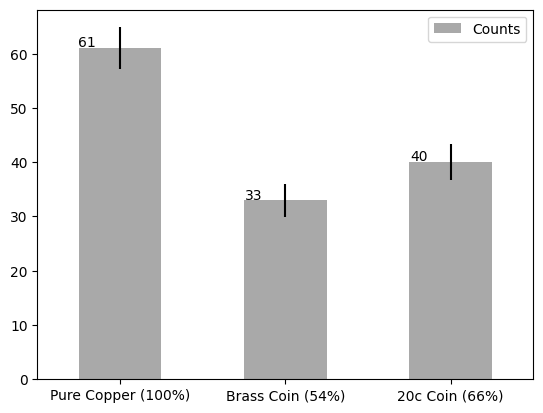

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
Cudf1=pd.read_csv(path+'exp5_1.tsv', sep='\t', skiprows=10)
Cudf2=pd.read_csv(path+'background_2.tsv', sep='\t',skiprows=10)
Cudf3=pd.read_csv(path+'background_5.tsv', sep='\t',skiprows=10)
Cudf4=pd.read_csv(path+'exp5_2.tsv', sep='\t', skiprows=10)
Cudf5=pd.read_csv(path+'exp5_Cuf1.tsv', sep='\t', skiprows=10)
Cudf6=pd.read_csv(path+'background_2fexp5.tsv', sep='\t', skiprows=10)
sum=Cudf6.loc[:, 'Voltage']
sum=np.sum(sum)
correction = np.ceil((Cudf2.loc[:, 'Voltage']+Cudf3.loc[:, 'Voltage']+sum)/10)
Cucdf=[]
i=1
while i <= 3:
  j=Cudf1.loc[i, 'Voltage']-correction
  Cucdf.append(j)
  i+=1
Cucdf2=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Cucdf:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Cucdf2.append(p3)
del Cucdf2[1::2]
Cu2cdf=[]
Cucdf2 = np.array(Cucdf2, dtype=np.float32)
Cucdf3 = Cucdf2/1.01
i=1
while i <= 3:
  j=Cudf4.loc[i, 'Voltage']-correction
  Cu2cdf.append(j)
  i+=1
Cu2cdf2=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Cu2cdf:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Cu2cdf2.append(p3)
del Cu2cdf2[1::2]
Cu2cdf2 = np.array(Cu2cdf2, dtype=np.float32)
Cu2cdf3 = Cu2cdf2/1.03
Cu3cdf=[]
i=1
while i <= 6:
  j=Cudf5.loc[i, 'Voltage']-correction
  Cu3cdf.append(j)
  i+=1
Cu3cdf2=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Cu3cdf:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Cu3cdf2.append(p3)
del Cu3cdf2[1::2]
Cu3cdf2 = np.array(Cu3cdf2, dtype=np.float32)
Cu3cdf3 = Cu3cdf2/1.03
Cu=np.sum(Cu3cdf3)/len(Cu3cdf3)
eCu=np.sum(np.log(Cu3cdf3))/len(Cu3cdf3)
Brass=(np.sum(y_datab1)+np.sum(y_datab2)+np.sum(y_databf))/(len(y_datab1)+len(y_datab2)+len(y_databf))
eBrass=(np.sum(np.log(y_datab1))+np.sum(np.log(y_datab2))+np.sum(np.log(y_databf)))/(len(y_datab1)+len(y_datab2)+len(y_databf))
c20=(np.sum(y_data20c1)+np.sum(y_data20c2)+np.sum(y_data20f))/(len(y_data20c1)+len(y_data20c2)+len(y_data20f))
ec20=(np.sum(np.log(y_data20c1))+np.sum(np.log(y_data20c2))+np.sum(np.log(y_data20f)))/(len(y_data20c1)+len(y_data20c2)+len(y_data20f))
#df = pd.DataFrame({'Pure Copper': [round(Cu)], 'Brass Coin': [round(Brass)],'20c Coin': [round(c20)]})
df = pd.DataFrame({'':['Pure Copper (100%)', 'Brass Coin (54%)', '20c Coin (66%)'], 'Counts':[round(Cu), round(Brass), round(c20)], 'yerr':[eCu, eBrass, ec20]})
ax = df.plot.bar(x='', y='Counts', yerr='yerr', rot=0, color='darkgrey')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
print('Count Uncertainties +/- for Bars Left to Right:',eCu, eBrass, ec20)
peb=(eBrass/Brass+Cu/eCu)*0.54
pe20c=(ec20/c20+Cu/eCu)*0.66
print('Percent Uncertainties +/- for Brass and 20c Coin Respectively:',peb, pe20c)